# Python - MQL5 integration

In [1]:
# Import packges
import MetaTrader5 as mt5
from datetime import datetime
import pandas as pd
import sys

# Plots
from matplotlib import pyplot as plt
import mplfinance as mpf
import seaborn as sns

# Package to work with Time zone
import pytz

In [2]:
sns.set()

In [3]:
# This notebook is using python 3.6. I had problems to import seaborn package for python 3.8.5
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

In [4]:
# Initialize terminal
if not mt5.initialize():
    print("Initialize failed")
    mt5.shutdown()

In [5]:
info = mt5.terminal_info()

In [6]:
info

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2981, maxbars=100000, codepage=0, ping_last=194318, community_balance=0.0, retransmission=1.7764511020913345, company='HF Markets (SV) Ltd.', name='HotForex MetaTrader 5', language='English', path='C:\\Program Files\\HotForex MetaTrader 5', ...)

In [7]:
# Broker's name
info.company

'HF Markets (SV) Ltd.'

In [8]:
mt5.version()

(500, 2981, '21 Jun 2021')

In [9]:
# Just in case we want to apply time zone corrections
# UTC Time zone
timezone = pytz.timezone("Etc/UTC")

# Datetime object without time zone variation
utc_from = datetime(2020, 1, 10, tzinfo=timezone)

### Request data from MetaTrader 5 terminal

In [10]:
date = datetime(2021,1,28,13)
n_bars = 500

# Let's try the different methods to request data. 15 mins data.
# The last 'n_bars' from specified date to current date
eurusd_rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M15, datetime(2021,6,28,13), n_bars)

# The last 'n_bars' from current date
eurgbp_rates = mt5.copy_rates_from_pos("EURGBP", mt5.TIMEFRAME_M15, 0, n_bars)

# Data between specified interval datetime
eurcad_rates = mt5.copy_rates_range("EURCAD", mt5.TIMEFRAME_M15, datetime(2021,6,1,13), datetime(2021,6,30,13))

In [11]:
# Dataframe EURGPD data
df_eurgbp = pd.DataFrame(eurgbp_rates)

In [12]:
df_eurgbp.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,1624646700,0.85911,0.85923,0.85868,0.85902,369,14,0
1,1624647600,0.85902,0.85913,0.85872,0.85878,240,14,0
2,1624648500,0.85880,0.85886,0.85830,0.85830,263,14,0
3,1624649400,0.85831,0.85837,0.85805,0.85822,230,14,0
4,1624650300,0.85822,0.85881,0.85822,0.85862,231,14,0


In [13]:
# Covert to datetime object 'time' column
df_eurgbp['time']=pd.to_datetime(df_eurgbp['time'], unit='s')

In [14]:
# Set time column to index
df_eurgbp.set_index(df_eurgbp['time'], inplace=True)

# Drop time colum
df_eurgbp.drop(['time'], axis=1, inplace=True)

# Drop 'real_volume' column. It does not have any information
df_eurgbp.drop(['real_volume'], axis=1, inplace=True)

In [15]:
df_eurgbp.head()

,open,high,low,close,tick_volume,spread
time,,,,,,
2021-06-25 18:45:00,0.85911,0.85923,0.85868,0.85902,369,14
2021-06-25 19:00:00,0.85902,0.85913,0.85872,0.85878,240,14
2021-06-25 19:15:00,0.85880,0.85886,0.85830,0.85830,263,14
2021-06-25 19:30:00,0.85831,0.85837,0.85805,0.85822,230,14
2021-06-25 19:45:00,0.85822,0.85881,0.85822,0.85862,231,14


In [16]:
# Print unique values for spread. According to this data, the spread does not remain constant
df_eurgbp['spread'].unique()

array([ 14,  18,  19, 117,  84,  36,  63,  44,  23,  15,  41,  43,  39,
        48,  17,  22,  30,  33,  46,  32,  20], dtype=int32)

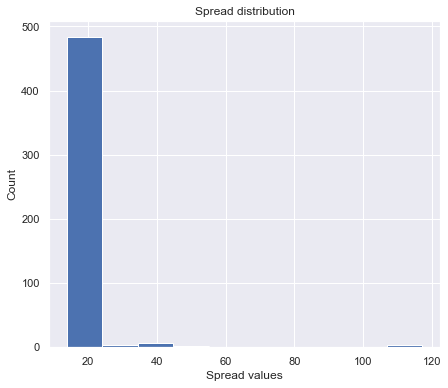

In [17]:
# Plot histogram for spread values

ax = df_eurgbp['spread'].hist(figsize=(7,6));
ax.set_title('Spread distribution');
ax.set_xlabel('Spread values');
ax.set_ylabel('Count');

The most spread values are around 20 pips. Now, we are going to select spread values under 25 pips.

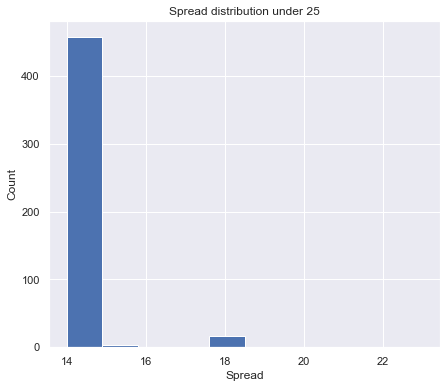

In [18]:
ax = df_eurgbp['spread'][df_eurgbp['spread'] < 25].hist(figsize=(7,6))
ax.set_title('Spread distribution under 25');
ax.set_xlabel('Spread');
ax.set_ylabel('Count');

The spread values are the most of the time (but not always) equals to 14 pips.

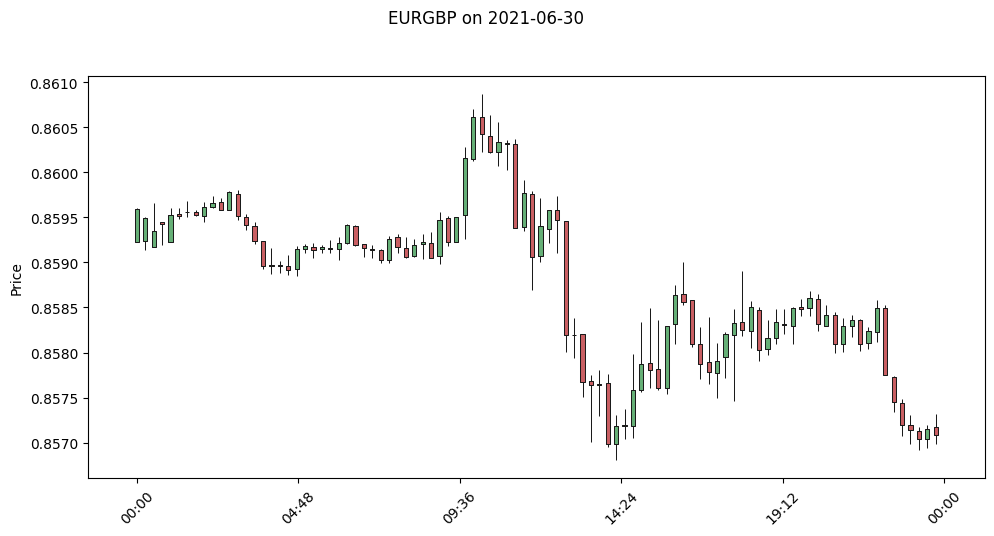

In [31]:
# Plot candlestick data for any single date
date = '2021-06-30'
mc = mpf.make_marketcolors(up='g', down='r')

# Create a style based on seaborn only add: base_mpl_style='seaborn'
style = mpf.make_mpf_style(marketcolors=mc);

# Plot with custom style
mpf.plot(df_eurgbp[['open', 'high', 'low', 'close']][date], type= 'candle', volume=False, show_nontrading=True,
                                                            title='EURGBP on '+ date, style=style, figratio=(13,6));

In [20]:
# Reorder array. The first row will be the current value
eurcad_rates[::-1]

array([(1625072400, 1.46887, 1.46922, 1.46773, 1.46791, 1508, 18, 0),
       (1625071500, 1.46863, 1.46921, 1.46818, 1.46886, 2070, 18, 0),
       (1625070600, 1.47045, 1.47046, 1.46828, 1.46865, 1977, 18, 0), ...,
       (1622568600, 1.47281, 1.47318, 1.47253, 1.47303, 1629, 18, 0),
       (1622567700, 1.47181, 1.47326, 1.47179, 1.47281, 2084, 18, 0),
       (1622566800, 1.47093, 1.47224, 1.47043, 1.47182, 2534, 18, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])